In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
#Creating dataset 

n_samples = 10_000 
rng = np.random.RandomState(32)

experiences = rng.normal(20, 10 , size=n_samples).astype(int)
experiences[experiences < 0] = 0 
abilities = rng.normal(0,0.15, size=n_samples)
parent_hourly_wages = 50 * rng.beta(2, 8, size=n_samples)
parent_hourly_wages[parent_hourly_wages < 0] = 0
college_degrees = (9 * abilities + 0.02 * parent_hourly_wages + rng.randn(n_samples) > 0.7).astype(int)

true_coefficient = pd.Series({"college degree": 2.0, "ability": 5.0, "experience":0.2, "parent_hourly_wage": 1.0})

hourly_wage = (
    true_coefficient["experience"] * experiences 
    + true_coefficient["parent_hourly_wage"] * parent_hourly_wages
    + true_coefficient["college degree"] * college_degrees
    + true_coefficient["ability"] * abilities 
    + rng.normal(0,1, size=n_samples)
)

hourly_wage[hourly_wage < 0] = 0

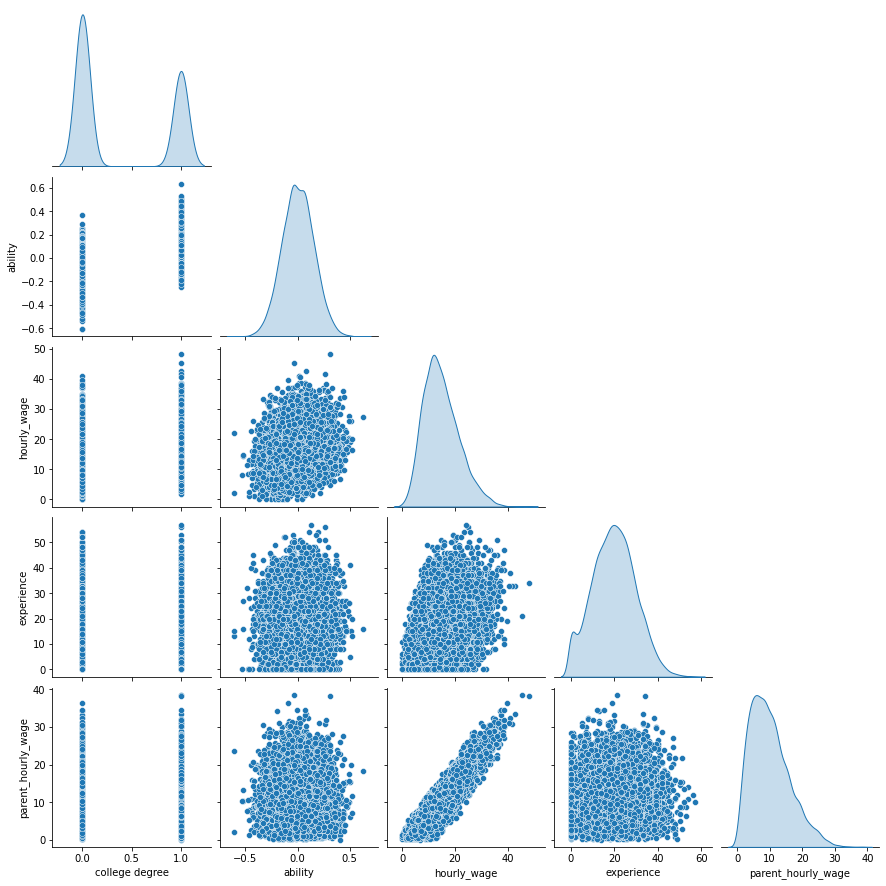

In [3]:
#Description of the simulated data 

df = pd.DataFrame({"college degree": college_degrees, 
                   "ability": abilities,
                   "hourly_wage": hourly_wage,
                   "experience": experiences,
                   "parent_hourly_wage": parent_hourly_wages})

grid = sns.pairplot(df, diag_kind="kde",corner=True)

Two models for predictions = 1. with fully observed variables, and second with partially observed variables 

In [4]:
from sklearn.model_selection import train_test_split 

target_name = "hourly_wage" 
X, y = df.drop(columns=target_name), df[target_name] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [5]:
#Model 1 : with fully observed variables 

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score 

In [6]:
df.head()

,college degree,ability,hourly_wage,experience,parent_hourly_wage
0,1,0.274564,13.095227,16,6.868791
1,0,0.121404,10.489049,29,3.748162
2,0,-0.197508,11.728002,25,6.648917
3,0,-0.055000,13.234164,20,9.689534
4,1,-0.087552,28.520249,27,22.721510


In [10]:
features_name = ["experience", "parent_hourly_wage","college degree", "ability"]

regressor_with_ability = LinearRegression()
regressor_with_ability.fit(X_train[features_name], y_train)

y_pred_with_ability = regressor_with_ability.predict(X_test[features_name])
R2_with_ability = r2_score(y_test, y_pred_with_ability)

print(f"R2 score with ability: {R2_with_ability:.3f}")

R2 score with ability: 0.975


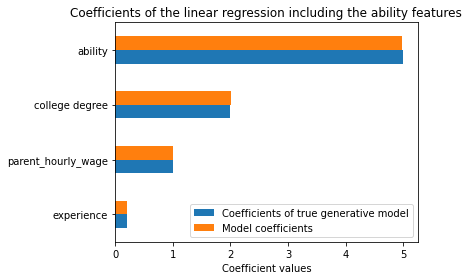

In [11]:
#visualizing first model - regressor with fully obseved variables 

model_coef = pd.Series(regressor_with_ability.coef_, index=features_name)
coef = pd.concat(
    [true_coefficient[features_name], model_coef],
    keys=["Coefficients of true generative model", "Model coefficients"],
    axis=1,
)
ax = coef.plot.barh()
ax.set_xlabel("Coefficient values")
ax.set_title("Coefficients of the linear regression including the ability features")
_ = plt.tight_layout()


Model with partial variables for modelling  - without "ability" variable

In [12]:
features_names = ["experience", "parent_hourly_wage", "college degree"]

regressor_without_ability = LinearRegression()
regressor_without_ability.fit(X_train[features_names], y_train)
y_pred_without_ability = regressor_without_ability.predict(X_test[features_names])
R2_without_ability = r2_score(y_test, y_pred_without_ability)

print(f"R2 score without ability: {R2_without_ability:.3f}")

R2 score without ability: 0.968


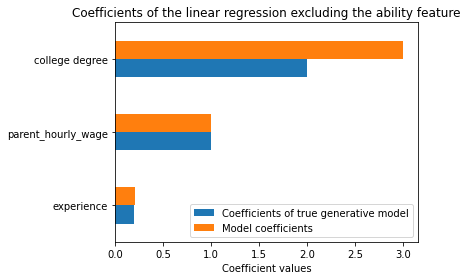

In [13]:
model_coef = pd.Series(regressor_without_ability.coef_, index=features_names)
coef = pd.concat(
    [true_coefficient[features_names], model_coef], keys=["Coefficients of true generative model", "Model coefficients"], axis=1)
ax = coef.plot.barh()
ax.set_xlabel("Coefficient values")
_ = ax.set_title("Coefficients of the linear regression excluding the ability feature")
plt.tight_layout()
plt.show()